In [1]:
import matplotlib.pyplot as plt
from vangja.datasets.loaders import load_kaggle_temperature, load_smart_home_readings

/home/jovan/miniconda3/envs/vangja20/lib/python3.13/site-packages/arviz/__init__.py:39: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


In [2]:
temp_df = load_kaggle_temperature(
    city="Boston",
    start_date="2015-01-01 05:00:00",
    end_date="2015-12-16 03:29:00",
    freq="D",
)
temp_df

,ds,y
0,2015-01-01,-3.029088
1,2015-01-02,1.428792
2,2015-01-03,-2.012833
3,2015-01-04,6.742104
4,2015-01-05,4.385771
...,...,...
345,2015-12-12,9.924024
346,2015-12-13,9.512454
347,2015-12-14,8.470003
348,2015-12-15,11.911281


In [3]:
def plot_both_dfs(df1, df2, title1="Series 1", title2="Series 2"):
    # Visualize both time series
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

    # Temperature
    axes[0].plot(df1["ds"], df1["y"], "C0-", linewidth=0.5, alpha=0.7)
    axes[0].set_title(title1)
    axes[0].set_ylabel("Temperature (°C)")
    axes[0].grid(True, alpha=0.3)

    # Sales
    axes[1].plot(df2["ds"], df2["y"], "C1-", linewidth=0.5, alpha=0.7)
    axes[1].set_title(title2)
    axes[1].set_ylabel("Number of Sales")
    axes[1].set_xlabel("Date")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [4]:
smart_home_df = load_smart_home_readings(
    column=["Furnace 1 [kW]", "Furnace 2 [kW]", "Fridge [kW]", "Wine cellar [kW]"],
    # start_date="2016-01-01 00:00:00",
    # end_date="2016-01-07 23:59:00",
    freq="D",
)
smart_home_df

,ds,y,series
0,2016-01-01,0.083106,Fridge [kW]
1,2016-01-02,0.051980,Fridge [kW]
2,2016-01-03,0.063992,Fridge [kW]
3,2016-01-04,0.049317,Fridge [kW]
4,2016-01-05,0.055650,Fridge [kW]
...,...,...,...
1399,2016-12-12,0.028141,Wine cellar [kW]
1400,2016-12-13,0.021090,Wine cellar [kW]
1401,2016-12-14,0.027129,Wine cellar [kW]
1402,2016-12-15,0.018033,Wine cellar [kW]


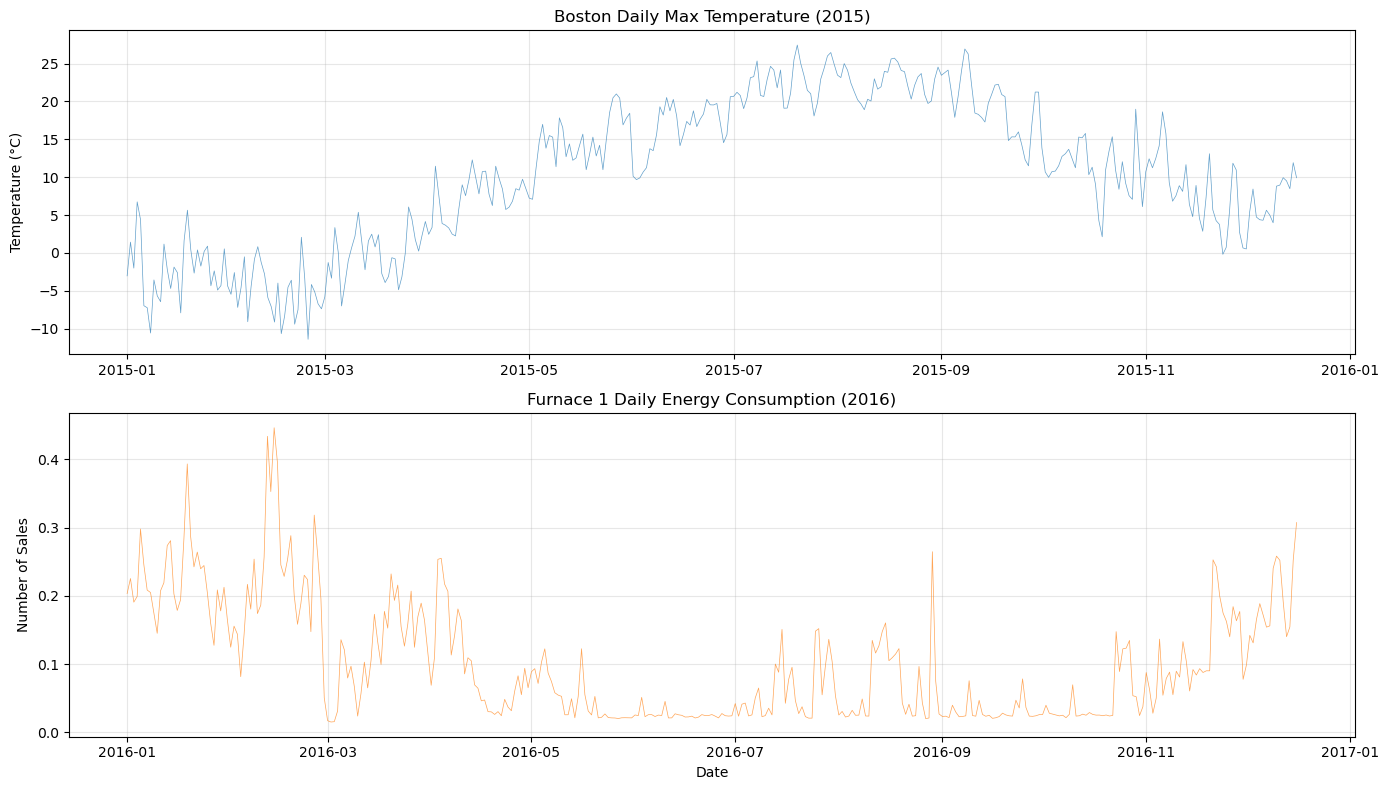

In [5]:
plot_both_dfs(
    temp_df,
    smart_home_df[smart_home_df["series"] == "Furnace 1 [kW]"],
    title1="Boston Daily Max Temperature (2015)",
    title2="Furnace 1 Daily Energy Consumption (2016)",
)

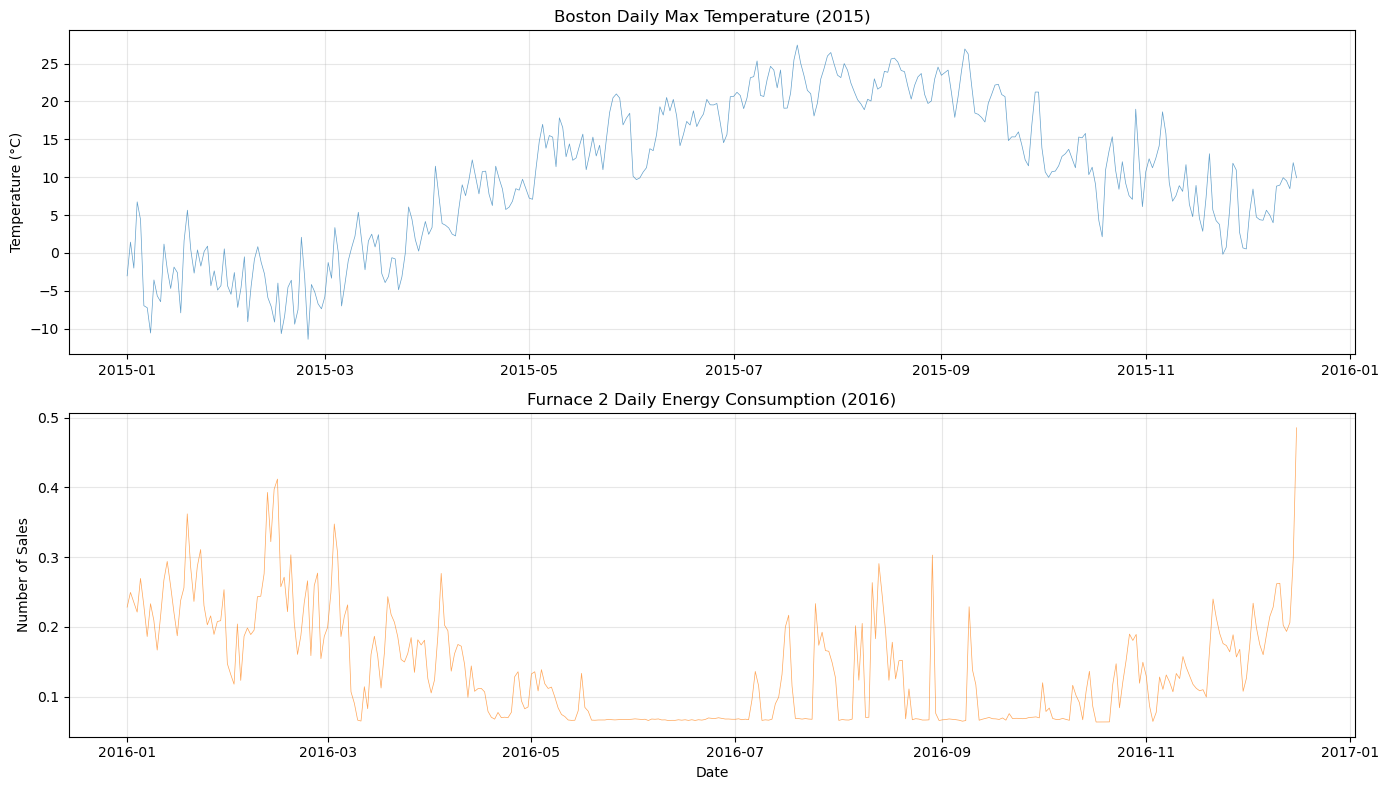

In [6]:
plot_both_dfs(
    temp_df,
    smart_home_df[smart_home_df["series"] == "Furnace 2 [kW]"],
    title1="Boston Daily Max Temperature (2015)",
    title2="Furnace 2 Daily Energy Consumption (2016)",
)

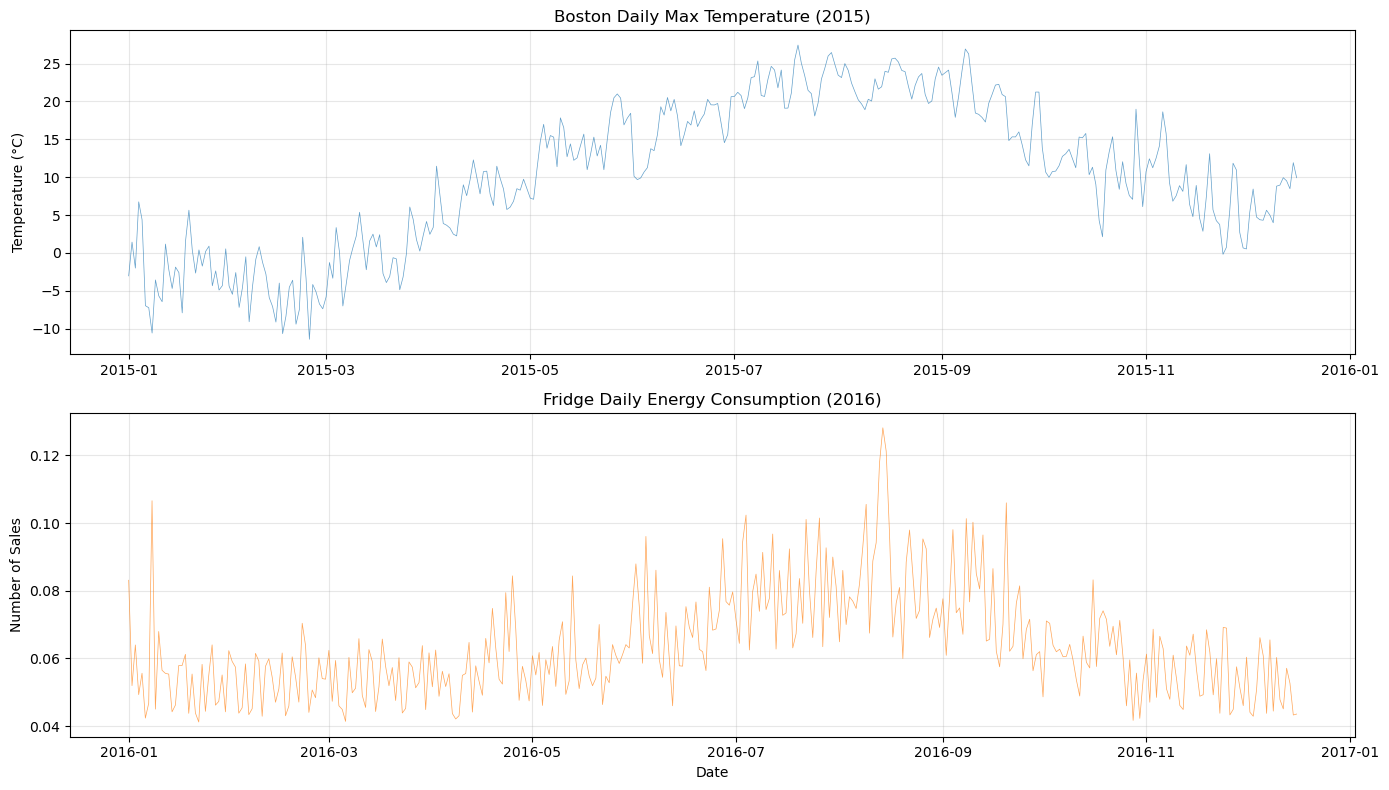

In [7]:
plot_both_dfs(
    temp_df,
    smart_home_df[smart_home_df["series"] == "Fridge [kW]"],
    title1="Boston Daily Max Temperature (2015)",
    title2="Fridge Daily Energy Consumption (2016)",
)

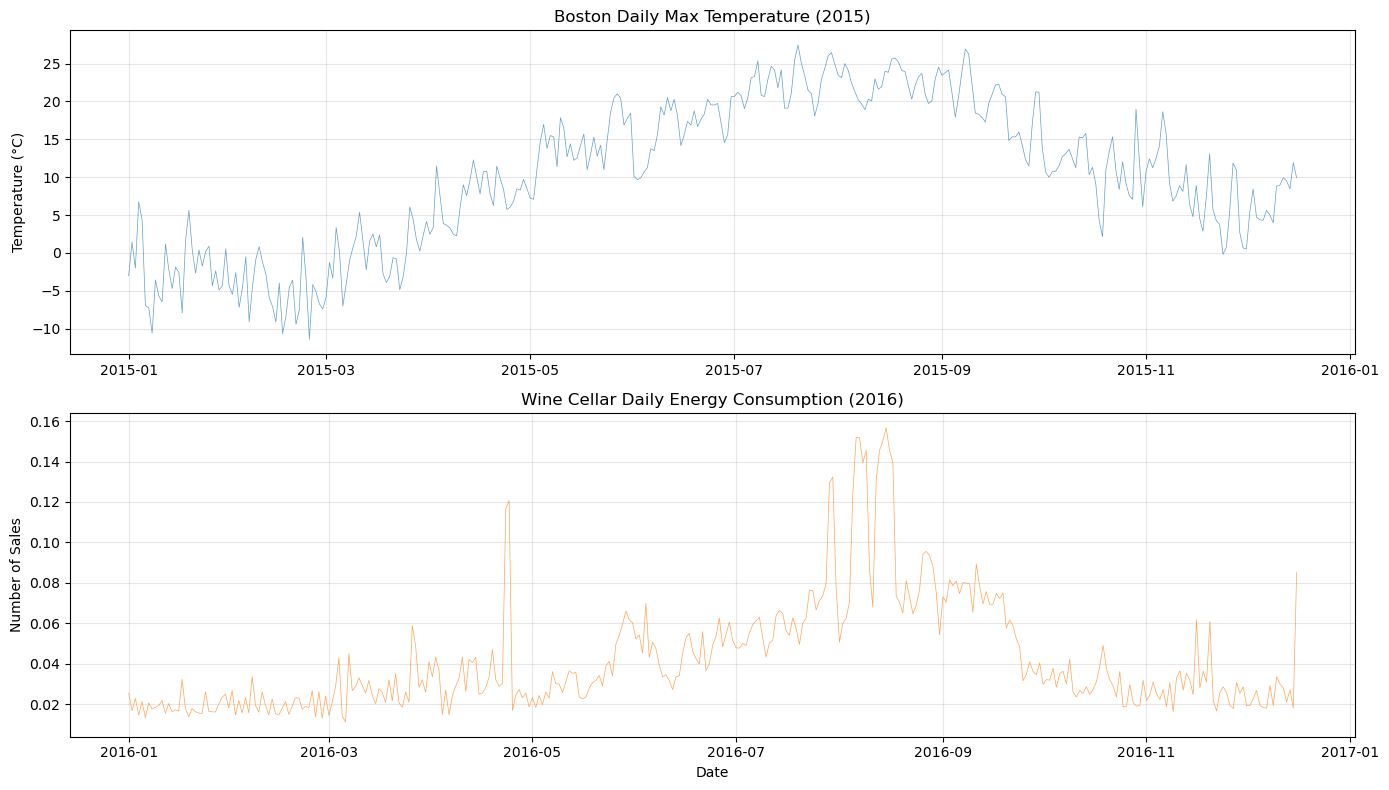

In [8]:
plot_both_dfs(
    temp_df,
    smart_home_df[smart_home_df["series"] == "Wine cellar [kW]"],
    title1="Boston Daily Max Temperature (2015)",
    title2="Wine Cellar Daily Energy Consumption (2016)",
)

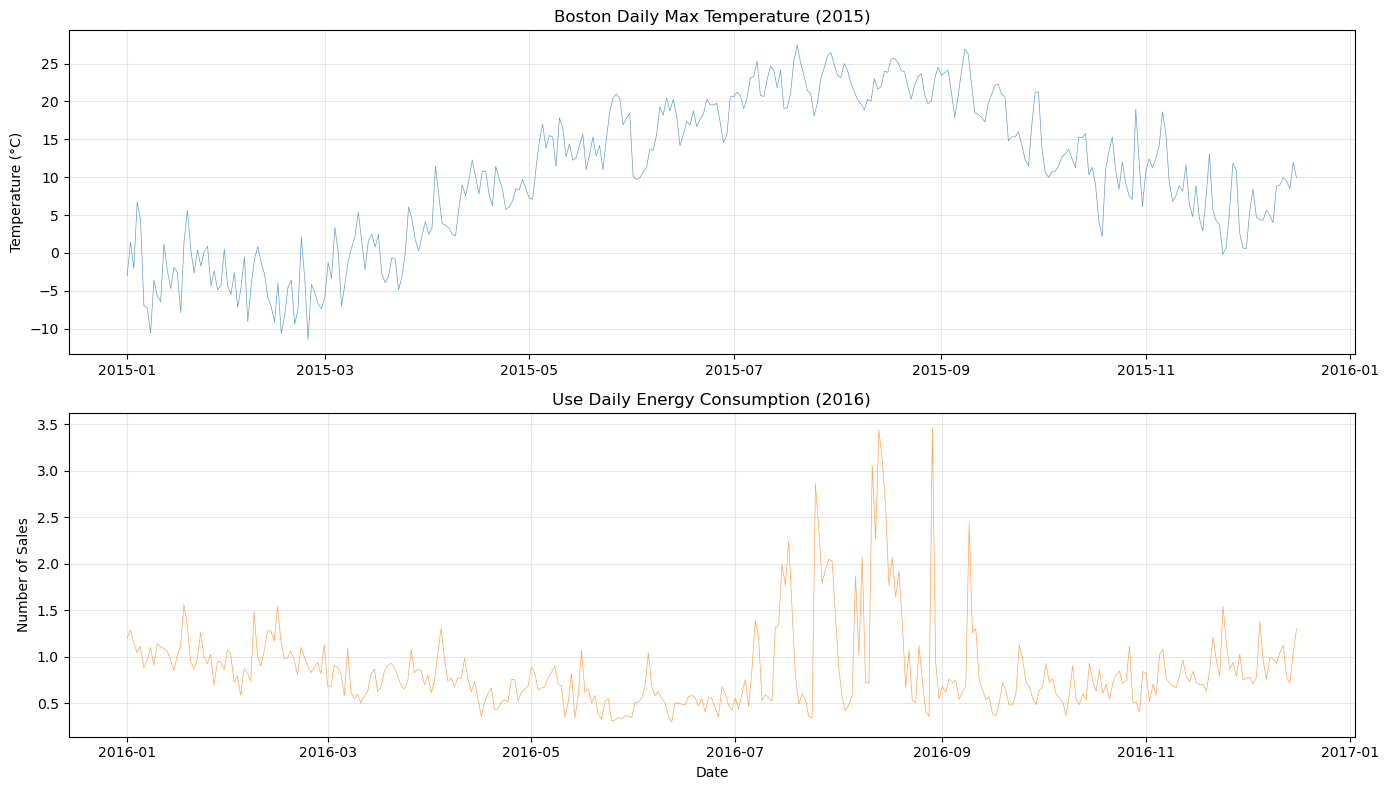

In [9]:
use_df = load_smart_home_readings(
    column="use [kW]",
    # start_date="2016-01-01 00:00:00",
    # end_date="2016-01-07 23:59:00",
    freq="D",
)
plot_both_dfs(
    temp_df,
    use_df,
    title1="Boston Daily Max Temperature (2015)",
    title2="Use Daily Energy Consumption (2016)",
)

Output()

Sampling: [fs_0 - beta(p=365,n=5), ft_0 - intercept, obs, sigma]


Prior predictive coverage: 0.5613230769230769


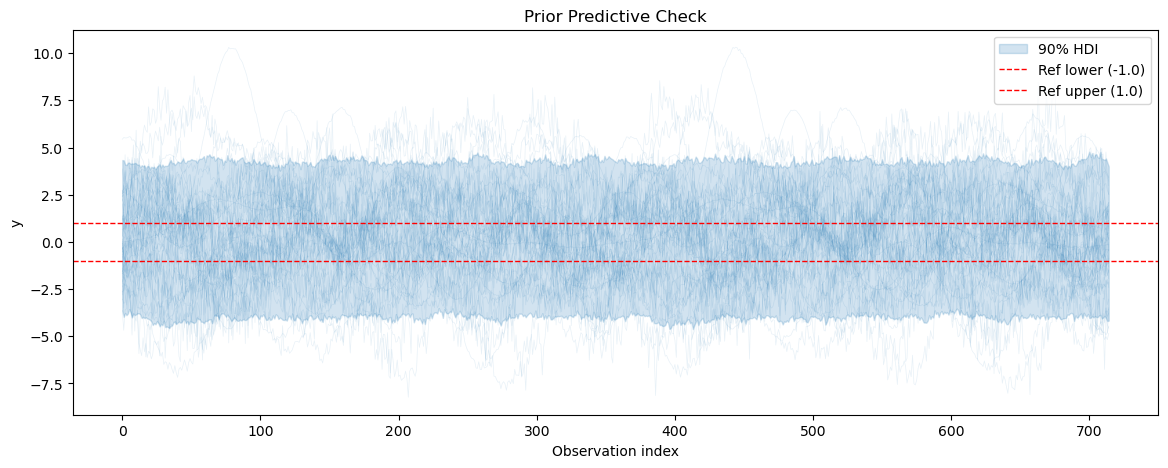

In [10]:
from vangja import FlatTrend, LinearTrend, FourierSeasonality
from vangja.utils import plot_prior_predictive, prior_predictive_coverage

temp_df = load_kaggle_temperature(
    city="Boston",
    start_date="2014-01-01 05:00:00",
    end_date="2015-12-16 03:29:00",
    freq="D",
)

temp_model = FlatTrend(intercept_sd=1) + FourierSeasonality(
    period=365, series_order=5, beta_sd=1
)
temp_model.fit(temp_df, scaler="minmax", method="mapx")
temp_prior_pred = temp_model.sample_prior_predictive()
plot_prior_predictive(
    temp_prior_pred, temp_model.data, show_hdi=True, show_ref_lines=True
)
print(f"Prior predictive coverage: {prior_predictive_coverage(temp_prior_pred)}")

In [11]:
temp_model = FlatTrend(intercept_sd=1) + FourierSeasonality(
    period=365, series_order=5, beta_sd=1
)
temp_model.fit(temp_df, scaler="minmax", method="nuts")

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ft_0 - intercept, fs_0 - beta(p=365,n=5), sigma]
/home/jovan/miniconda3/envs/vangja20/lib/python3.13/multiprocessing/popen_fork.py:67: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/home/jovan/miniconda3/envs/vangja20/lib/python3.13/multiprocessing/popen_fork.py:67: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


Sampling: [obs]


Output()

<Axes: title={'center': 'Posterior Predictive Check'}, xlabel='Observation index', ylabel='y'>

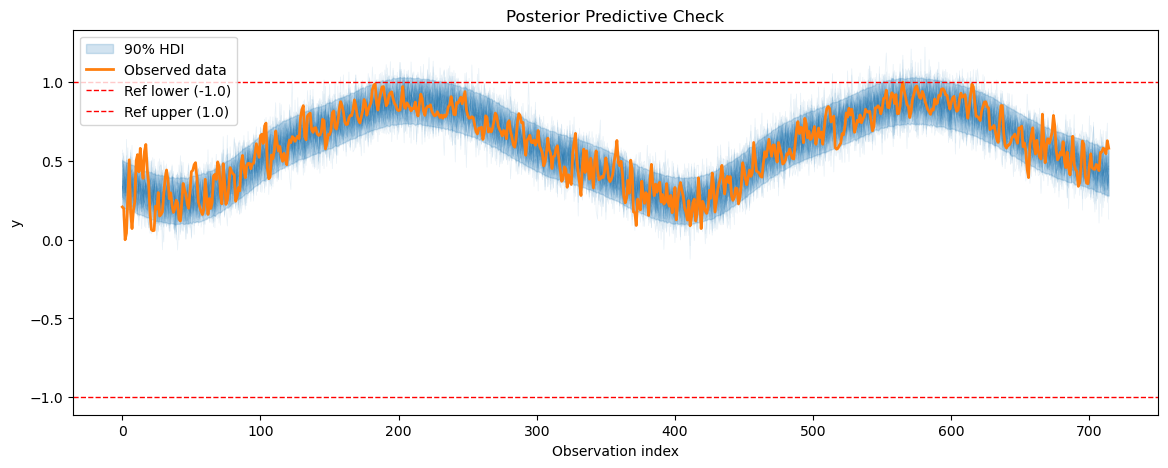

In [12]:
from vangja.utils import plot_posterior_predictive


temp_posterior_pred = temp_model.sample_posterior_predictive()
plot_posterior_predictive(temp_posterior_pred, temp_model.data, show_hdi=True, show_ref_lines=True)

In [13]:
smart_home_df[smart_home_df["ds"] < "2016-04-01"]

,ds,y,series
0,2016-01-01,0.083106,Fridge [kW]
1,2016-01-02,0.051980,Fridge [kW]
2,2016-01-03,0.063992,Fridge [kW]
3,2016-01-04,0.049317,Fridge [kW]
4,2016-01-05,0.055650,Fridge [kW]
...,...,...,...
1139,2016-03-27,0.048635,Wine cellar [kW]
1140,2016-03-28,0.028288,Wine cellar [kW]
1141,2016-03-29,0.032049,Wine cellar [kW]
1142,2016-03-30,0.025792,Wine cellar [kW]


In [14]:
from vangja.components.uniform_constant import UniformConstant


train_df = smart_home_df[smart_home_df["ds"] < "2016-04-01"]
smart_home_model = (
    FlatTrend(intercept_sd=1, pool_type="individual")
    + UniformConstant(lower=-1, upper=1, pool_type="partial")
    * FourierSeasonality(
        period=365,
        series_order=5,
        beta_sd=1,
        tune_method="parametric",
        pool_type="partial",
    )
    + FourierSeasonality(period=7, series_order=3, beta_sd=1, pool_type="partial")
)
smart_home_model.fit(
    train_df,
    scaler="minmax",
    method="mapx",
    scale_mode="individual",
    sigma_pool_type="individual",
    t_scale_params=temp_model.t_scale_params,
    idata=temp_model.trace,
)

Output()

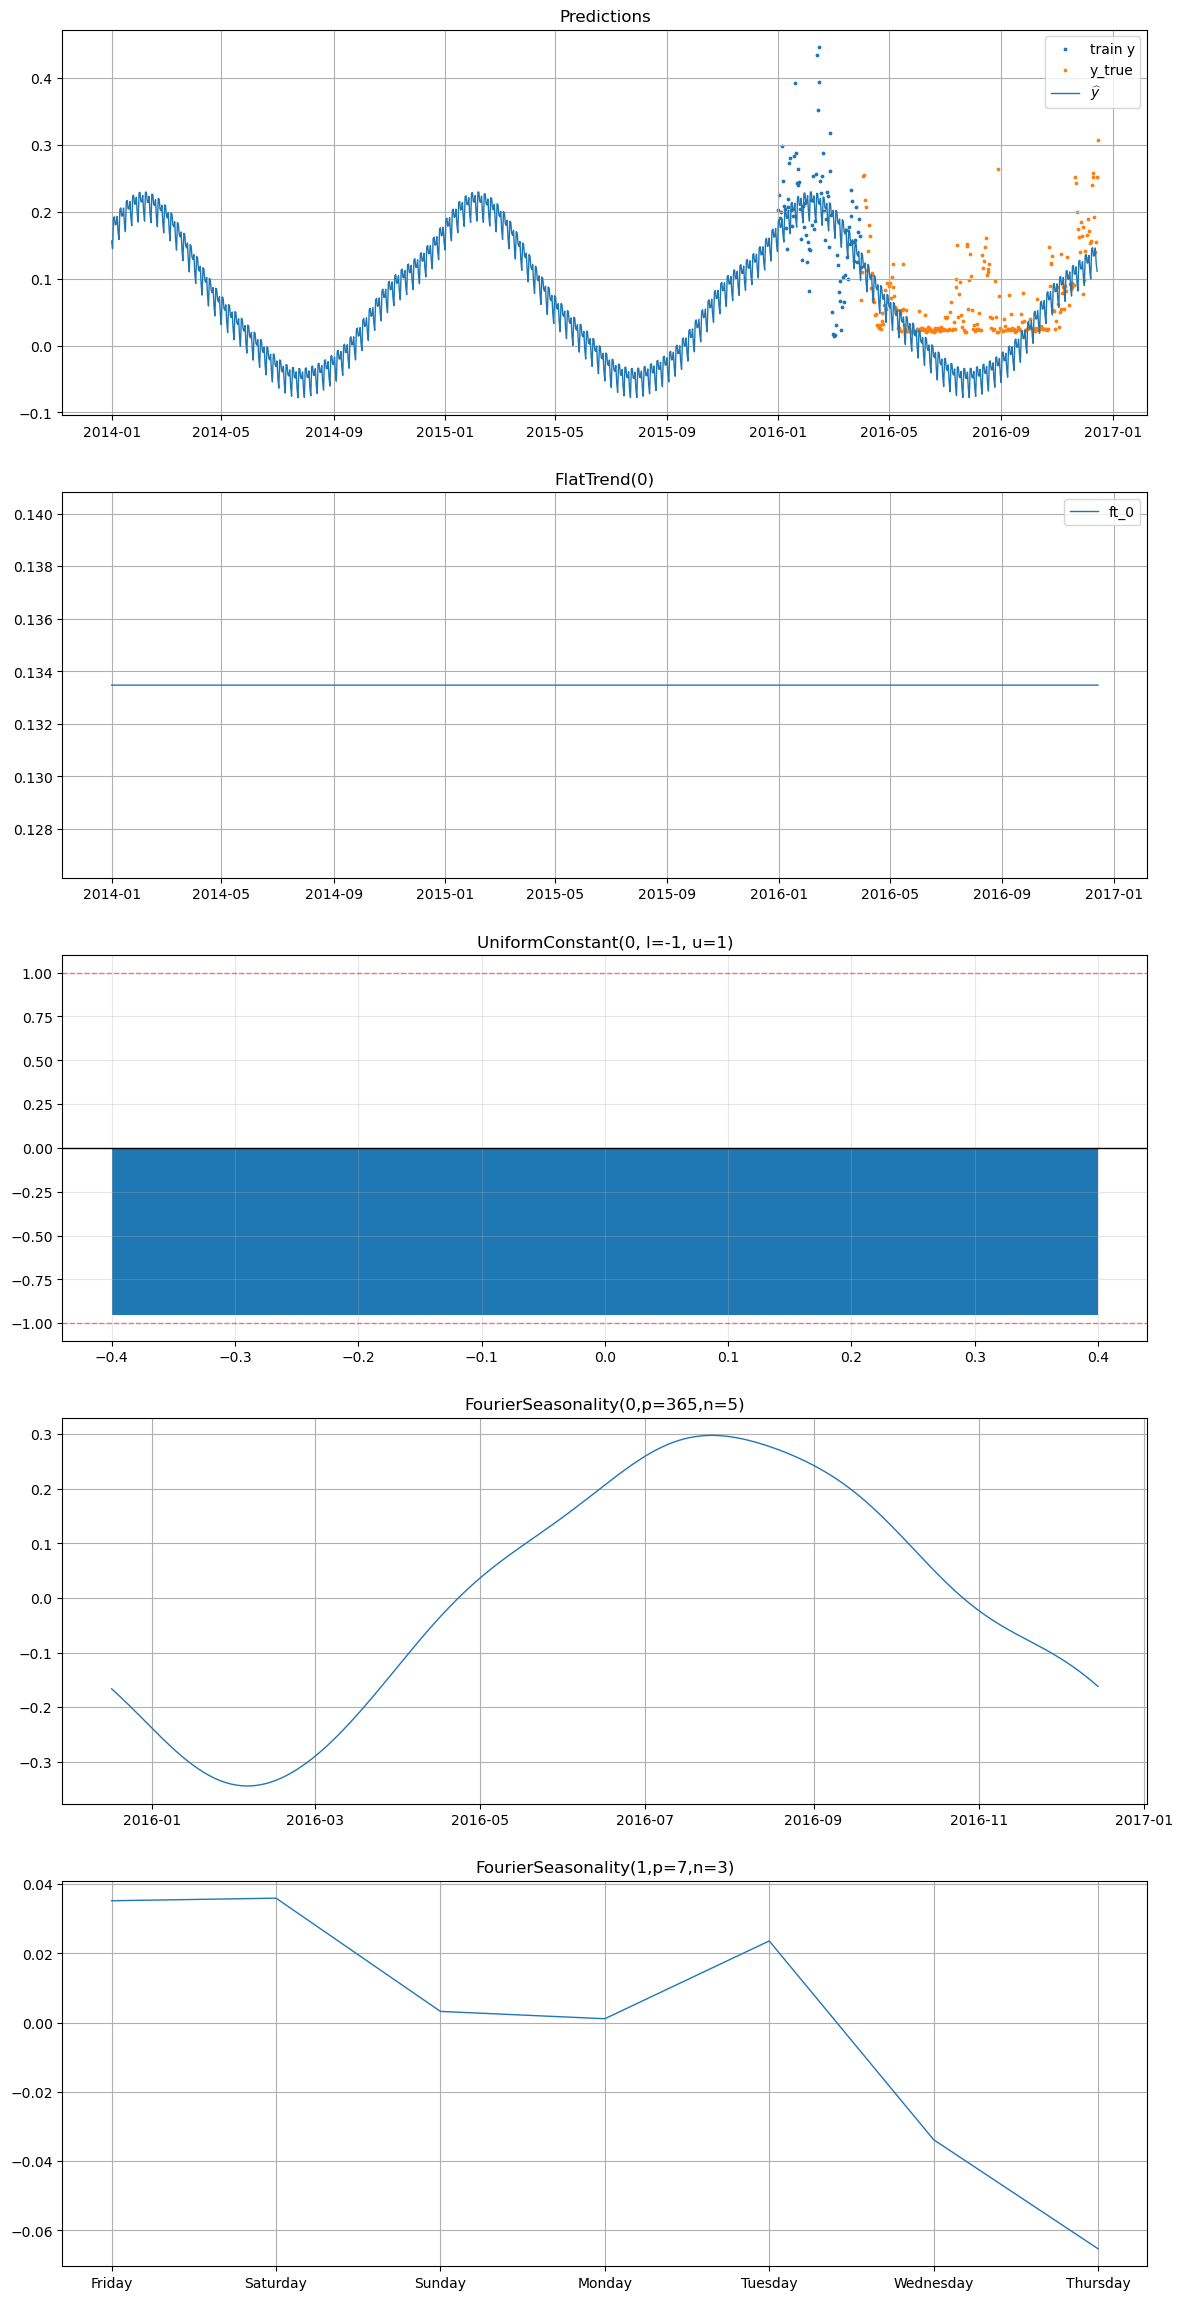

In [15]:
future = smart_home_model.predict(horizon=365)
smart_home_model.plot(
    future,
    series="Furnace 1 [kW]",
    y_true=smart_home_df[
        (smart_home_df["series"] == "Furnace 1 [kW]")
        & (smart_home_df["ds"] >= "2016-04-01")
    ],
)

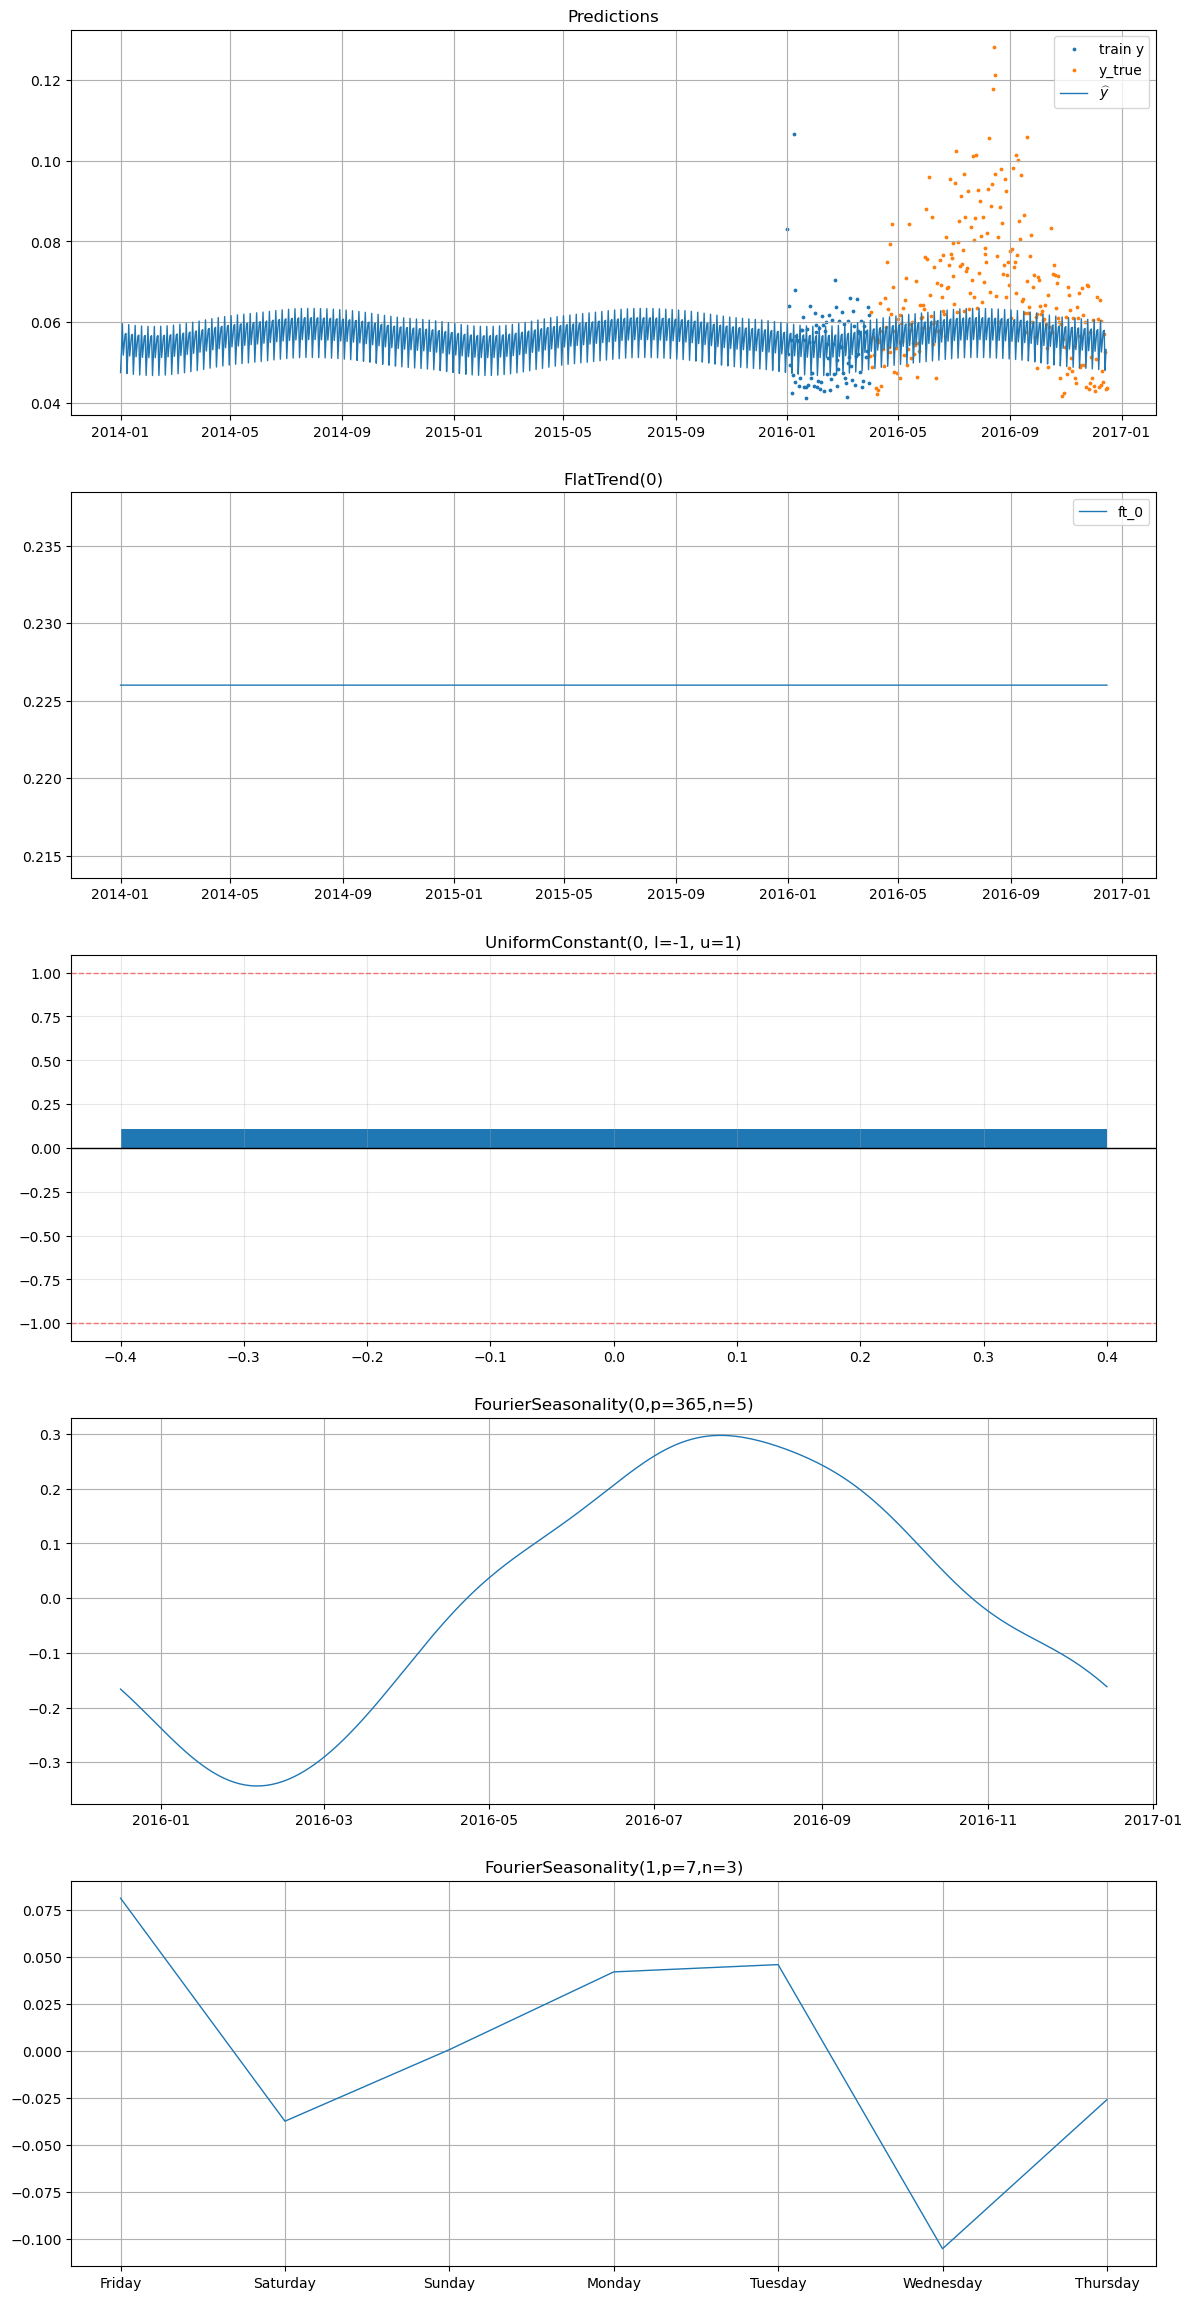

In [16]:
future = smart_home_model.predict(horizon=365)
smart_home_model.plot(
    future,
    series="Fridge [kW]",
    y_true=smart_home_df[
        (smart_home_df["series"] == "Fridge [kW]")
        & (smart_home_df["ds"] >= "2016-04-01")
    ],
)

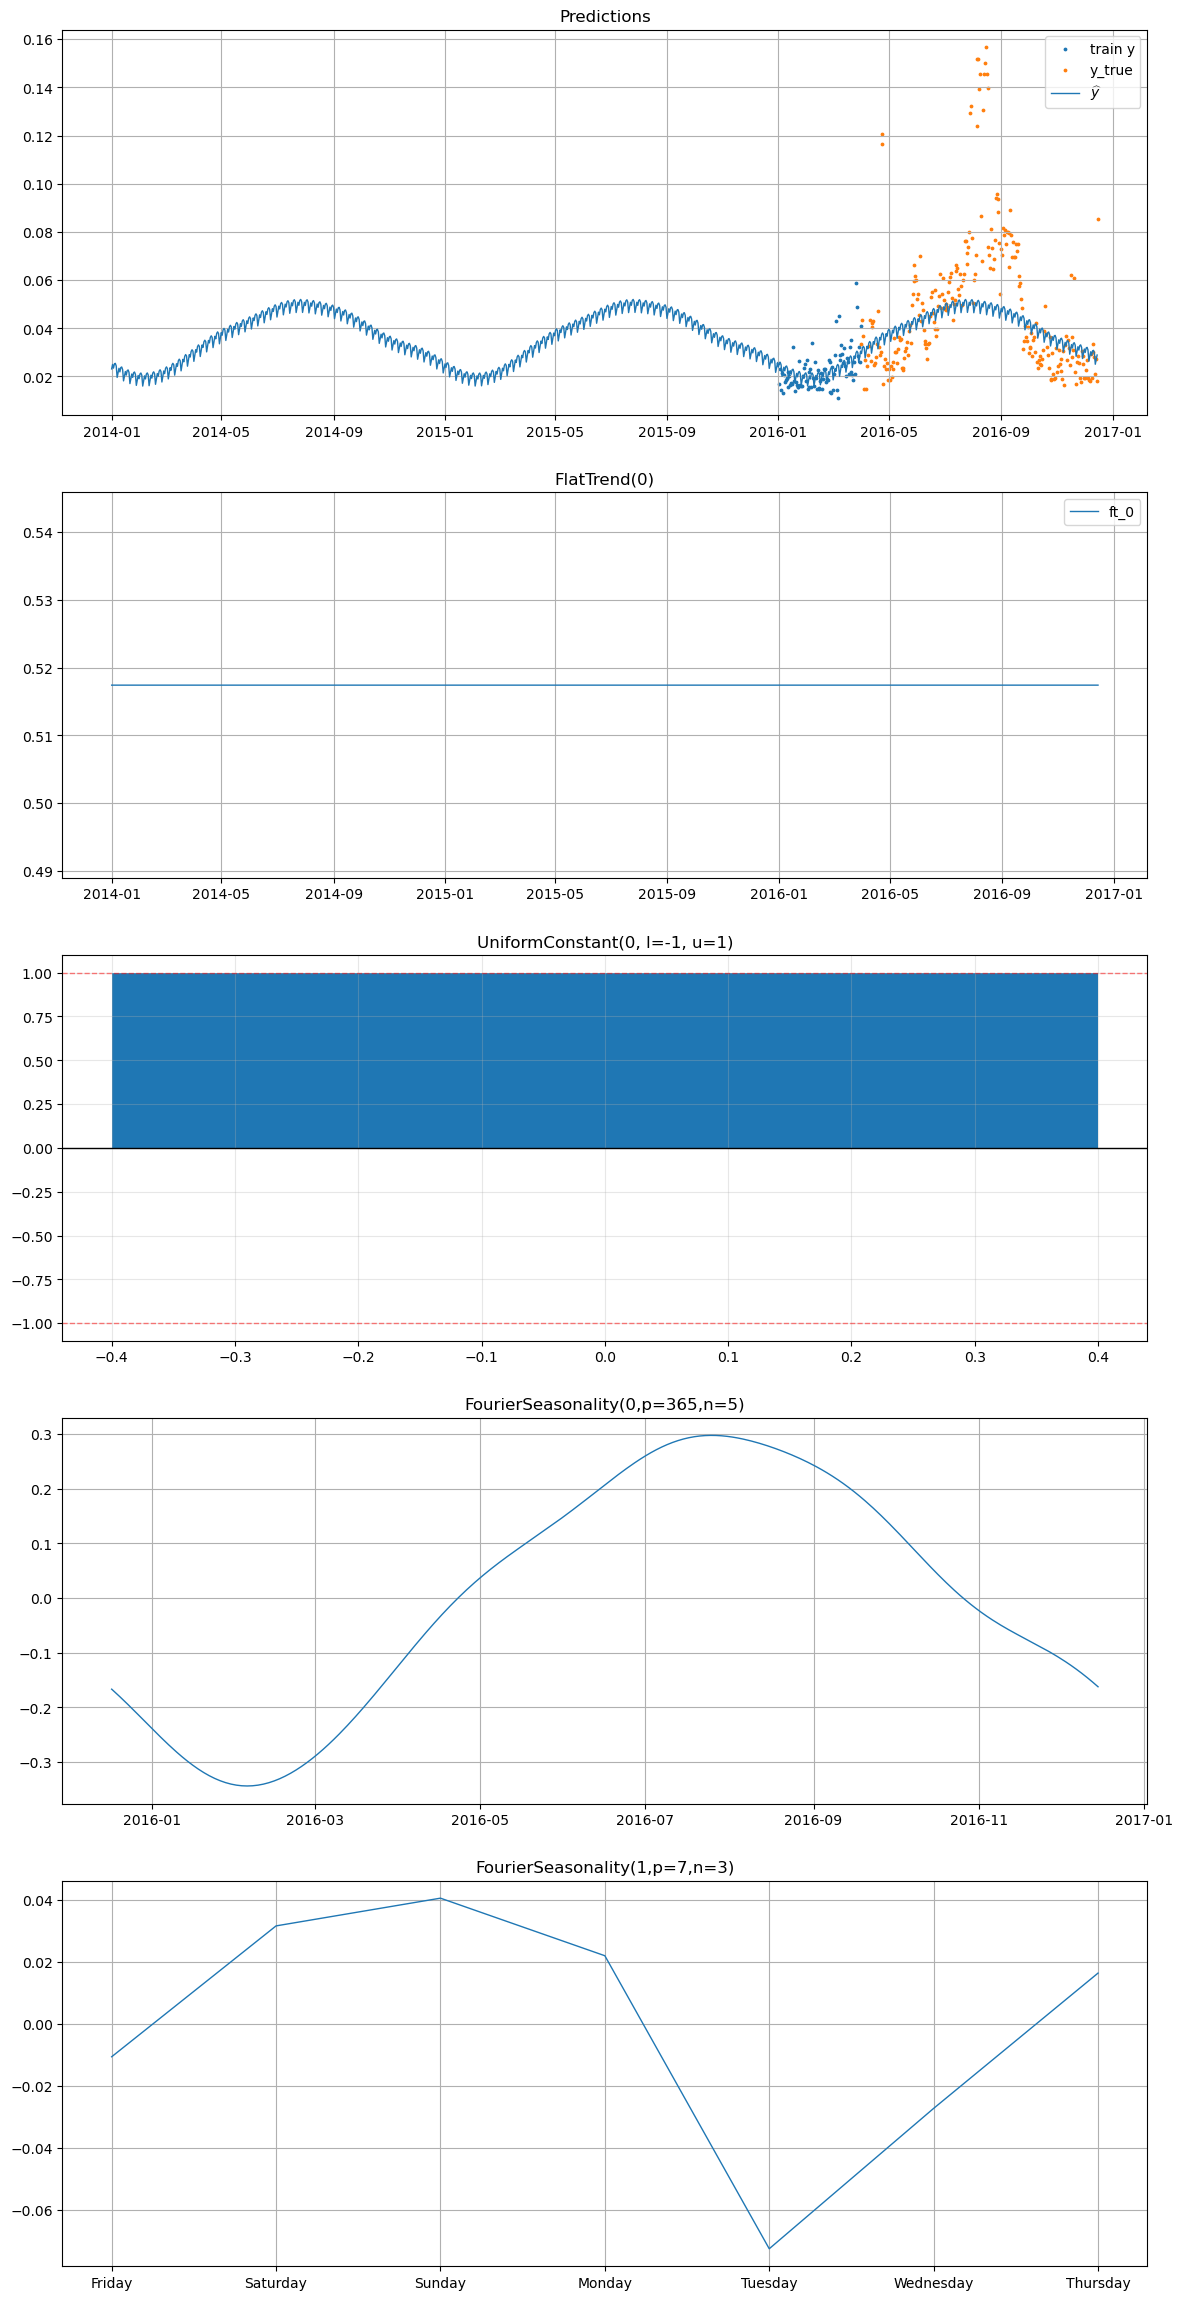

In [17]:
smart_home_model.plot(
    future,
    series="Wine cellar [kW]",
    y_true=smart_home_df[
        (smart_home_df["series"] == "Wine cellar [kW]")
        & (smart_home_df["ds"] >= "2016-04-01")
    ],
)

/home/jovan/repos/vangja/src/vangja/time_series.py:646: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  return pm.sample_prior_predictive(samples=samples)
Sampling: [fs_0 - beta_shared, fs_0 - beta_sigma(p=365,n=5), fs_0 - beta_z_offset(p=365,n=5), fs_1 - beta_shared, fs_1 - beta_sigma(p=7,n=3), fs_1 - beta_z_offset(p=7,n=3), ft_0 - intercept, obs, sigma, uc_0 - c_offset, uc_0 - c_shared, uc_0 - c_sigma]


<Axes: title={'center': 'Prior Predictive Check'}, xlabel='Observation index', ylabel='y'>

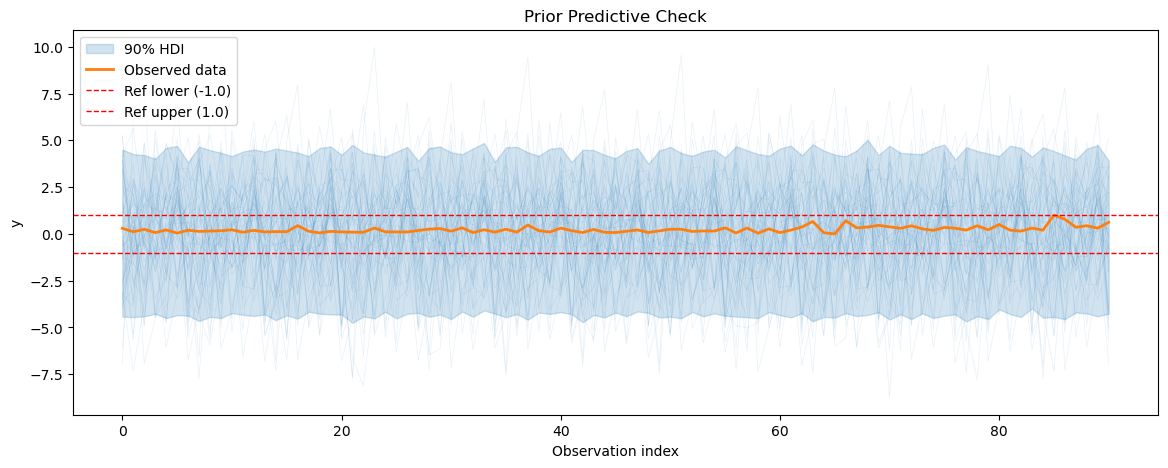

In [21]:
smart_home_prior_pred = smart_home_model.sample_prior_predictive()
plot_prior_predictive(
    smart_home_prior_pred,
    series_idx=3,
    group=smart_home_model.group,
    data=smart_home_model.data,
    show_hdi=True,
    show_ref_lines=True,
)